### Riiiiice

# LDA

In [2]:
import warnings
import urllib.request as req
import urllib.parse as par
from konlpy.tag import Okt
from collections import Counter
import wordcloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
warnings.filterwarnings(action='ignore')

In [3]:
data1=pd.read_excel("ida2data/del_naver_blog_2019.xlsx")
data6=pd.read_excel("ida2data/naver_cafe_ssal_contents_2019_전처리완.xlsx")

In [4]:
data1.info()
#data2.info()
data6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8471 entries, 0 to 8470
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    8469 non-null   object
 1   date     8470 non-null   object
 2   chat     3998 non-null   object
 3   content  8179 non-null   object
 4   id       8272 non-null   object
dtypes: object(5)
memory usage: 331.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9554 entries, 0 to 9553
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     9554 non-null   object
 1   nickname  9554 non-null   object
 2   date      9554 non-null   object
 3   content   9549 non-null   object
 4   comments  9036 non-null   object
dtypes: object(5)
memory usage: 373.3+ KB


In [5]:
d1=pd.concat([data1,data6])
d1=d1[["date","content"]]
d1

,date,content
0,2019.01.29.,":: Pocohol Recipe ::\n우리 아이를 위한 첫 요리, 쌀미음 만들기\..."
1,2019.01.20.,#쌀케이크만들기\n\n\n\n쌀케이크만들기의 기본은\n#제누와즈만들기 !!\n\n#...
2,2019.01.09.,일본식 소고기카레 만드는법 ⓦ. 전남쌀 10kg\n어릴때는 지금도 때때로 ㅋ \n노...
3,2019.01.22.,건강요리 강좌에서 쌀누룩으로 다양한 요리를 만들 수 있는 것을 알고\n호기심과 ...
4,2019.01.27.,"곤약밥\n만드는 법\n#곤약밥\n글, 사진 / 카렌C\n요즘 집에서 식사할 때 먹고..."
...,...,...
9549,2019.12.17,쌀과자 냠냠 맛있게 먹으며 열심히 즐겁게 공부해봐요~💕
9550,2019.12.13,저울은 준비를 안했어요분유스푼으로 쌀가루 몇그램 나올까요?초기이유식입니다
9551,2019.12.24,*오늘의 최저가 정보롯데 백화점 납품 10kg 쌀등급 상두개 구매 개당 23.7...
9552,2019.12.15,쌀튀밥 두개 (유통기한 2020.3.17)어그 130사이즈(사용감 잇네용)검정 운동...


In [6]:
data=d1.dropna(axis=0, how='any', subset = ["content"]) 
data=data.reset_index()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17728 entries, 0 to 17727
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    17728 non-null  int64 
 1   date     17727 non-null  object
 2   content  17728 non-null  object
dtypes: int64(1), object(2)
memory usage: 415.6+ KB


In [7]:
result_double_list=[]
for i in data.index:
    content=str(data.loc[i,"content"])
    if len(content)>10:
        
        result=[i,content]
        result_double_list.append(result)
    else:
        print(content)
    

이름이 특히한쌀 ㅋ
쌀 파실분 계신가요
오셔야합니다
권선구입니다
농사지은쌀 삽니다.
문자주세요~
 20키로짜리에요 
판매해요~
쌀
쌀 썩어요 ㅠㅠ
쌀이젖었네요ㅜㅜ
정자동입니다~
쌀 항아리 드립니다
신도시 운서동입니다
   
쌀 삽니다
쌀맛있는곳요?
황토쌀단지25000
쌀세일하는곳급함
쌀전업농 입니다.
쌀 니들이나처먹어 
보리~보리~쌀~~
쌀괜찮은건가요?ㅜㅜ
쌀이 떨어졌네요 ㅜ
맛난쌀과자
정상인쌀
    
쌀 사왔네요
쌀 가지고 가요
모현,부송댓챗만원
쌀 휘낭시에입ㄴ당 
쌀 4만원 20키로
쌀있나요?
오늘받은쌀이에요~
쌀가루구해봅니다.
권선동 입니다^^
쌀시몬컵케이크에용
패배자 쌀...
내가좋아하는쌀ㅋㅋ


In [8]:
data=data.reset_index()

In [9]:
data

,level_0,index,date,content
0,0,0,2019.01.29.,":: Pocohol Recipe ::\n우리 아이를 위한 첫 요리, 쌀미음 만들기\..."
1,1,1,2019.01.20.,#쌀케이크만들기\n\n\n\n쌀케이크만들기의 기본은\n#제누와즈만들기 !!\n\n#...
2,2,2,2019.01.09.,일본식 소고기카레 만드는법 ⓦ. 전남쌀 10kg\n어릴때는 지금도 때때로 ㅋ \n노...
3,3,3,2019.01.22.,건강요리 강좌에서 쌀누룩으로 다양한 요리를 만들 수 있는 것을 알고\n호기심과 ...
4,4,4,2019.01.27.,"곤약밥\n만드는 법\n#곤약밥\n글, 사진 / 카렌C\n요즘 집에서 식사할 때 먹고..."
...,...,...,...,...
17723,17723,9549,2019.12.17,쌀과자 냠냠 맛있게 먹으며 열심히 즐겁게 공부해봐요~💕
17724,17724,9550,2019.12.13,저울은 준비를 안했어요분유스푼으로 쌀가루 몇그램 나올까요?초기이유식입니다
17725,17725,9551,2019.12.24,*오늘의 최저가 정보롯데 백화점 납품 10kg 쌀등급 상두개 구매 개당 23.7...
17726,17726,9552,2019.12.15,쌀튀밥 두개 (유통기한 2020.3.17)어그 130사이즈(사용감 잇네용)검정 운동...


In [10]:
result_df=pd.DataFrame(result_double_list,columns=["index","text"])
print(result_df.shape)
result_df

(17689, 2)


,index,text
0,0,":: Pocohol Recipe ::\n우리 아이를 위한 첫 요리, 쌀미음 만들기\..."
1,1,#쌀케이크만들기\n\n\n\n쌀케이크만들기의 기본은\n#제누와즈만들기 !!\n\n#...
2,2,일본식 소고기카레 만드는법 ⓦ. 전남쌀 10kg\n어릴때는 지금도 때때로 ㅋ \n노...
3,3,건강요리 강좌에서 쌀누룩으로 다양한 요리를 만들 수 있는 것을 알고\n호기심과 ...
4,4,"곤약밥\n만드는 법\n#곤약밥\n글, 사진 / 카렌C\n요즘 집에서 식사할 때 먹고..."
...,...,...
17684,17723,쌀과자 냠냠 맛있게 먹으며 열심히 즐겁게 공부해봐요~💕
17685,17724,저울은 준비를 안했어요분유스푼으로 쌀가루 몇그램 나올까요?초기이유식입니다
17686,17725,*오늘의 최저가 정보롯데 백화점 납품 10kg 쌀등급 상두개 구매 개당 23.7...
17687,17726,쌀튀밥 두개 (유통기한 2020.3.17)어그 130사이즈(사용감 잇네용)검정 운동...


In [11]:
result_df.drop_duplicates(inplace=True)
result_df.shape

(17689, 2)

In [12]:
from konlpy.tag import Okt
okt = Okt()

In [13]:
import re
def cleanText(readData):
    text=re.sub("[^(가-힣a-zA-Z0-9. )]", '',readData)
    return text

In [14]:
from tqdm import tqdm
mas_double_list=[]
for text in tqdm(result_df['text']):
    mas_loc=okt.nouns(cleanText(text))
    mas_double_list.append(mas_loc)

100%|██████████| 17689/17689 [07:54<00:00, 37.27it/s]


In [15]:
result_df["mas"]=mas_double_list
result_df.head()

,index,text,mas
0,0,":: Pocohol Recipe ::\n우리 아이를 위한 첫 요리, 쌀미음 만들기\...","[우리, 아이, 위, 첫, 요리, 쌀, 미음, 만들기, 하루, 하루, 기적, 우리,..."
1,1,#쌀케이크만들기\n\n\n\n쌀케이크만들기의 기본은\n#제누와즈만들기 !!\n\n#...,"[쌀, 케이크, 만들기, 쌀, 케이크, 만들기, 기본, 누, 만들기, 누, 저, 경..."
2,2,일본식 소고기카레 만드는법 ⓦ. 전남쌀 10kg\n어릴때는 지금도 때때로 ㅋ \n노...,"[일본, 소고기, 카레, 법, 전남, 쌀, 때, 지금, 뚜기, 카레, 향신료, 냄새..."
3,3,건강요리 강좌에서 쌀누룩으로 다양한 요리를 만들 수 있는 것을 알고\n호기심과 ...,"[건강, 요리, 강좌, 쌀, 누룩, 요리, 수, 것, 알, 호기심, 보고, 마음, ..."
4,4,"곤약밥\n만드는 법\n#곤약밥\n글, 사진 / 카렌C\n요즘 집에서 식사할 때 먹고...","[곤약, 밥, 법, 곤약, 밥글, 사진, 카렌, 요즘, 집, 식사, 때, 곤약, 밥..."


In [16]:
st = ['천원', '꼭걸', '먹이', '그날', '삭제', '키', '정말', '입', '만', '포스팅', '약간', '정보', 
'말', '어제', '옵션', '아래', '분', '처음', '개', '년', '혹시', '사람', '시', '추천', '쌀', '애', '저희', '로', '이용',
 '판매', '체', '가요', '사', '번호', '이제', '나', '을', '경우', '오늘', '아주', '진짜', '모두', '자동', '날', '시골', '는', '손', 
 '생각', '질문', '연락', '살', '역시', '센치', '구입', '끼', '용', '사실', '것', '배', '위', '요즘', '다른', '지금', '불', '시작', 
 '다시', '우리', '은', '사랑', '거', '킹', '제품', '등', '조금', '내', '이후', '앞', '줄', '단계', '이번', '직접', '이', '재생',
  '좀', '미니', '봉', '가', '맘', '월', '듯', '중', '저', '신분', '첫', '미리', '더', '사용', '여기', '농사', '요', '한번', '작성', 
  '게시', '주문', '어디', '농', '산', '개월', '거의', '안', '를', '완전', '제', '및', '실', '글', '원', '다음', '위해', '곳', '그냥',
   '구매', '초기', '준비', '도', '계속', '때', '유통', '살짝', '먹기', '후', '나눔', '때모두', '댓글', '알', '규정', '정도', '점', 
   '스푼', '얼마', '화질', '일', '못', '마을', '만원', '아시', '하루', '걸', '전', '바로', '수', '또', '중기', '번', '먼저', '달', 
   '기', '건', '반', '구', '숟가락', '사진', '선택', '사서', '호', '완성', '가지', '뭐', '가장', '내일', '공지', '때문', '방법', 
   '보고', '이상', '끝', '하나', '해', '사항', '한국', '그', '습', '꼭', '왜', '떡뻥',
   "보시","함","총","몇","뭘","등등","장","옆","담","길","보","주","초","볼","게","해도",'보통',"데","식",'초',"똑","포","로만","해먹","온","하니","늘","틀","속","명","뒤",
"단", "여", "지은","바","막",'쪽',"뭘","총","약","낼"]

In [17]:
data

,level_0,index,date,content
0,0,0,2019.01.29.,":: Pocohol Recipe ::\n우리 아이를 위한 첫 요리, 쌀미음 만들기\..."
1,1,1,2019.01.20.,#쌀케이크만들기\n\n\n\n쌀케이크만들기의 기본은\n#제누와즈만들기 !!\n\n#...
2,2,2,2019.01.09.,일본식 소고기카레 만드는법 ⓦ. 전남쌀 10kg\n어릴때는 지금도 때때로 ㅋ \n노...
3,3,3,2019.01.22.,건강요리 강좌에서 쌀누룩으로 다양한 요리를 만들 수 있는 것을 알고\n호기심과 ...
4,4,4,2019.01.27.,"곤약밥\n만드는 법\n#곤약밥\n글, 사진 / 카렌C\n요즘 집에서 식사할 때 먹고..."
...,...,...,...,...
17723,17723,9549,2019.12.17,쌀과자 냠냠 맛있게 먹으며 열심히 즐겁게 공부해봐요~💕
17724,17724,9550,2019.12.13,저울은 준비를 안했어요분유스푼으로 쌀가루 몇그램 나올까요?초기이유식입니다
17725,17725,9551,2019.12.24,*오늘의 최저가 정보롯데 백화점 납품 10kg 쌀등급 상두개 구매 개당 23.7...
17726,17726,9552,2019.12.15,쌀튀밥 두개 (유통기한 2020.3.17)어그 130사이즈(사용감 잇네용)검정 운동...


In [19]:
int(len(data)/2 )

8864

In [20]:
p = " "
for i in range( int(len(data)/2) ):
    try:
        p += data['content'][i]+" "  
    except:
        pass
    
nouns = okt.nouns(p)
nouns2=nouns
#nouns3=nouns
nouns2_copy=nouns.copy()

In [23]:
q = " "
for i in range(int(len(data)/2), len(data)):
    try:
        q += data['content'][i]+" "  
    except:
        pass
    
nouns = okt.nouns(q)
nouns3=nouns
#nouns3=nouns
nouns3_copy=nouns.copy()

In [24]:
nouns_copy = nouns2_copy + nouns3_copy

In [22]:
len( nouns2_copy)#, nouns3_copy

1566427

In [25]:
r=[]

for i in nouns_copy :
    if i =="아가":
        t=i.replace("아가","아이")
        r.append(t)
    else:
       r.append(i) 
nouns_copy=r



r=[]

for i in nouns_copy :
    if i =="아기":
        t=i.replace("아기","아이")
        r.append(t)
    else:
       r.append(i) 
nouns_copy=r


r=[]

for i in nouns_copy :
    if i =="애기":
        t=i.replace("애기","아이")
        r.append(t)
    else:
       r.append(i) 
nouns_copy=r


r=[]

for i in nouns_copy :
    if i =="베이":
        t=i.replace("베이","베이킹")
        r.append(t)
    else:
       r.append(i) 
nouns_copy=r

r=[]
for i in nouns_copy :
    if i =="쌀벌레":
        t=i.replace("쌀벌레","벌레")
        r.append(t)
    else:
       r.append(i) 
nouns_copy=r

r=[]
for i in nouns_copy :
    if i =="벌래":
        t=i.replace("벌래","벌레")
        r.append(t)
    else:
       r.append(i) 
nouns_copy=r

r=[]
for i in nouns_copy :
    if i =="쌀벌래":
        t=i.replace("쌀벌래","벌레")
        r.append(t)
    else:
       r.append(i) 
nouns_copy=r

r=[]
for i in nouns_copy :
    if i =="바구미":
        t=i.replace("바구미","벌레")
        r.append(t)
    else:
       r.append(i) 
nouns_copy=r


r=[]
for i in nouns_copy :
    if i =="기한":
        t=i.replace("기한","유통기한")
        r.append(t)
    else:
       r.append(i) 
nouns_copy=r


r=[]
for i in nouns_copy :
    if i =="배송":
        t=i.replace("배송","배달")
        r.append(t)
    else:
       r.append(i) 
nouns_copy=r


r=[]
for i in nouns_copy :
    if i =="택배":
        t=i.replace("택배","배달")
        r.append(t)
    else:
       r.append(i) 
nouns_copy=r



r=[]
for i in nouns_copy :
    if i =="박력":
        t=i.replace("박력","박력분")
        r.append(t)
    else:
       r.append(i) 
nouns_copy=r



In [26]:
count = Counter(nouns_copy)

count

# remove_char_counter = Counter({x: count[x] for x in count if len(x) > 1})
remove_char_counter = Counter(
    {x: count[x] for x in count if x not in st})

print(remove_char_counter)

Counter({'맛': 15355, '가루': 14737, '밥': 14573, '아이': 13743, '이유식': 13318, '물': 9418, '과자': 8770, '미음': 6915, '집': 5521, '떡': 5356, '현미': 4640, '빵': 4611, '케이크': 4547, '간식': 4526, '재료': 4500, '유기농': 4424, '보관': 4319, '시간': 4197, '곤약': 3951, '포장': 3946, '수업': 3592, '배달': 3524, '피자': 3340, '엄마': 3188, '가격': 2985, '만들기': 2964, '찹쌀': 2874, '선물': 2872, '느낌': 2853, '베이킹': 2792, '떡볶이': 2580, '밀가루': 2514, '치즈': 2462, '다이어트': 2357, '소고기': 2332, '향': 2301, '백미': 2255, '카페': 2255, '식빵': 2248, '양': 2247, '반죽': 2224, '마음': 2142, '쿠키': 2117, '식감': 2071, '음식': 2058, '도정': 2041, '건강': 2040, '메뉴': 2009, '종류': 1998, '밥맛': 1989, '설탕': 1907, '야채': 1886, '막걸리': 1879, '크림': 1788, '초코': 1777, '우유': 1761, '디저트': 1761, '고구마': 1753, '냄비': 1751, '레시피': 1744, '핫도그': 1719, '단호박': 1694, '일반': 1673, '아침': 1672, '모양': 1621, '소스': 1603, '후기': 1588, '클래스': 1579, '박스': 1548, '감자': 1541, '용기': 1530, '라이스': 1508, '냉동': 1504, '강정': 1499, '무': 1488, '국내': 1488, '냄새': 1470, '품종': 1464, '통': 1456, '맛집': 1446, '누룽지': 1438, '봉지':

In [27]:
count = Counter(remove_char_counter).most_common()
count

[('맛', 15355),
 ('가루', 14737),
 ('밥', 14573),
 ('아이', 13743),
 ('이유식', 13318),
 ('물', 9418),
 ('과자', 8770),
 ('미음', 6915),
 ('집', 5521),
 ('떡', 5356),
 ('현미', 4640),
 ('빵', 4611),
 ('케이크', 4547),
 ('간식', 4526),
 ('재료', 4500),
 ('유기농', 4424),
 ('보관', 4319),
 ('시간', 4197),
 ('곤약', 3951),
 ('포장', 3946),
 ('수업', 3592),
 ('배달', 3524),
 ('피자', 3340),
 ('엄마', 3188),
 ('가격', 2985),
 ('만들기', 2964),
 ('찹쌀', 2874),
 ('선물', 2872),
 ('느낌', 2853),
 ('베이킹', 2792),
 ('떡볶이', 2580),
 ('밀가루', 2514),
 ('치즈', 2462),
 ('다이어트', 2357),
 ('소고기', 2332),
 ('향', 2301),
 ('백미', 2255),
 ('카페', 2255),
 ('식빵', 2248),
 ('양', 2247),
 ('반죽', 2224),
 ('마음', 2142),
 ('쿠키', 2117),
 ('식감', 2071),
 ('음식', 2058),
 ('도정', 2041),
 ('건강', 2040),
 ('메뉴', 2009),
 ('종류', 1998),
 ('밥맛', 1989),
 ('설탕', 1907),
 ('야채', 1886),
 ('막걸리', 1879),
 ('크림', 1788),
 ('초코', 1777),
 ('우유', 1761),
 ('디저트', 1761),
 ('고구마', 1753),
 ('냄비', 1751),
 ('레시피', 1744),
 ('핫도그', 1719),
 ('단호박', 1694),
 ('일반', 1673),
 ('아침', 1672),
 ('모양', 1621),
 ('소스', 1603

In [28]:
mas_counts=Counter(remove_char_counter)
data_barh=pd.DataFrame(mas_counts.most_common(50),
columns=["word","counts"])
data_barh.head()

,word,counts
0,맛,15355
1,가루,14737
2,밥,14573
3,아이,13743
4,이유식,13318


In [29]:
min_count=100
word_list=[]
for word,count in count:
    if count>min_count:
        word_list.append(word)
        

In [30]:
print(len(word_list))
word_list

2217


['맛',
 '가루',
 '밥',
 '아이',
 '이유식',
 '물',
 '과자',
 '미음',
 '집',
 '떡',
 '현미',
 '빵',
 '케이크',
 '간식',
 '재료',
 '유기농',
 '보관',
 '시간',
 '곤약',
 '포장',
 '수업',
 '배달',
 '피자',
 '엄마',
 '가격',
 '만들기',
 '찹쌀',
 '선물',
 '느낌',
 '베이킹',
 '떡볶이',
 '밀가루',
 '치즈',
 '다이어트',
 '소고기',
 '향',
 '백미',
 '카페',
 '식빵',
 '양',
 '반죽',
 '마음',
 '쿠키',
 '식감',
 '음식',
 '도정',
 '건강',
 '메뉴',
 '종류',
 '밥맛',
 '설탕',
 '야채',
 '막걸리',
 '크림',
 '초코',
 '우유',
 '디저트',
 '고구마',
 '냄비',
 '레시피',
 '핫도그',
 '단호박',
 '일반',
 '아침',
 '모양',
 '소스',
 '후기',
 '클래스',
 '박스',
 '감자',
 '용기',
 '라이스',
 '냉동',
 '강정',
 '무',
 '국내',
 '냄새',
 '품종',
 '통',
 '맛집',
 '누룽지',
 '봉지',
 '문의',
 '조청',
 '저녁',
 '마트',
 '햅쌀',
 '고민',
 '벌레',
 '걱정',
 '발효',
 '부분',
 '떡국',
 '바삭',
 '요리',
 '비',
 '치킨',
 '식품',
 '버터',
 '스틱',
 '친구',
 '일단',
 '진행',
 '추가',
 '고로케',
 '잡곡',
 '생산',
 '과일',
 '차',
 '지역',
 '쌀밥',
 '가족',
 '소개',
 '더욱',
 '확인',
 '눈',
 '이유',
 '대신',
 '카스테라',
 '앙금',
 '그대로',
 '법',
 '그릇',
 '라면',
 '면',
 '영양',
 '오븐',
 '입맛',
 '세트',
 '보기',
 '모습',
 '딸기',
 '칼로리',
 '식사',
 '색',
 '제일',
 '벼',
 '기분',
 '참고',
 '재배',
 '상태',
 '소금',

In [31]:
CHANGE_WORDS_SET=[['아가', '아이'],
 ['아기', '아이'],
 ['애기', '아이'],
 ['베이', '베이킹'],
 ['쌀벌레', '벌레'],
 ['벌래', '벌레'],
 ['쌀벌래', '벌레'],
 ['바구미', '벌레'],
 ['기한', '유통기한'],
 ['배송', '배달'],
 ['택배', '배달'],
 ['박력', '박력분']]

In [32]:
result_df

,index,text,mas
0,0,":: Pocohol Recipe ::\n우리 아이를 위한 첫 요리, 쌀미음 만들기\...","[우리, 아이, 위, 첫, 요리, 쌀, 미음, 만들기, 하루, 하루, 기적, 우리,..."
1,1,#쌀케이크만들기\n\n\n\n쌀케이크만들기의 기본은\n#제누와즈만들기 !!\n\n#...,"[쌀, 케이크, 만들기, 쌀, 케이크, 만들기, 기본, 누, 만들기, 누, 저, 경..."
2,2,일본식 소고기카레 만드는법 ⓦ. 전남쌀 10kg\n어릴때는 지금도 때때로 ㅋ \n노...,"[일본, 소고기, 카레, 법, 전남, 쌀, 때, 지금, 뚜기, 카레, 향신료, 냄새..."
3,3,건강요리 강좌에서 쌀누룩으로 다양한 요리를 만들 수 있는 것을 알고\n호기심과 ...,"[건강, 요리, 강좌, 쌀, 누룩, 요리, 수, 것, 알, 호기심, 보고, 마음, ..."
4,4,"곤약밥\n만드는 법\n#곤약밥\n글, 사진 / 카렌C\n요즘 집에서 식사할 때 먹고...","[곤약, 밥, 법, 곤약, 밥글, 사진, 카렌, 요즘, 집, 식사, 때, 곤약, 밥..."
...,...,...,...
17684,17723,쌀과자 냠냠 맛있게 먹으며 열심히 즐겁게 공부해봐요~💕,"[쌀, 과자, 공부]"
17685,17724,저울은 준비를 안했어요분유스푼으로 쌀가루 몇그램 나올까요?초기이유식입니다,"[저울, 준비, 분유, 스푼, 쌀, 가루, 그램, 초기, 이유식]"
17686,17725,*오늘의 최저가 정보롯데 백화점 납품 10kg 쌀등급 상두개 구매 개당 23.7...,"[오늘, 최저, 정보, 롯데, 백화점, 납품, 쌀, 등급, 상, 개, 구매, 제품,..."
17687,17726,쌀튀밥 두개 (유통기한 2020.3.17)어그 130사이즈(사용감 잇네용)검정 운동...,"[쌀, 튀밥, 개, 유통, 기한, 어그, 사이즈, 용감, 검정, 운동화, 사이즈, ..."


In [33]:
mas_double_list=[]
for mas_loc in result_df["mas"]:
    mas_sptd=mas_loc
    mas_list=[]
    for mas in mas_sptd:
        if mas not in st and mas in word_list:
            for cw in CHANGE_WORDS_SET:
                if cw[0]==mas:
                    mas==cw[1]
            mas_list.append(mas)
    mas_double_list.append(mas_list)

In [34]:
len(mas_double_list)

17689

In [36]:
from gensim import corpora
from gensim import models

In [37]:
dictionary=corpora.Dictionary(mas_double_list)

In [38]:
corpus=[]
for mas_loc in mas_double_list:
    term_vect=dictionary.doc2bow(mas_loc)
    corpus.append(term_vect)

In [42]:
from konlpy.tag import Mecab
from tqdm import tqdm
import re
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric
import logging
import pickle
import pyLDAvis.gensim
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [44]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


def find_optimal_number_of_topics(dictionary, corpus, processed_data):
    limit = 50;
    start = 2;
    step = 2;

    model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=processed_data, start=start, limit=limit, step=step)

    x = range(start, limit, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.grid(True)
    plt.show()


#for m,cv in zip(x, coherence_values):
#    print("Num Topics =", m , 'has Coherence value of', round(cv,4))


In [45]:
dictionary.filter_extremes(no_below=100)
corpus = [dictionary.doc2bow(text) for text in (mas_double_list)]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 1644
Number of documents: 17689


2021-08-26 23:23:24,451 : INFO : using symmetric alpha at 0.5
2021-08-26 23:23:24,452 : INFO : using symmetric eta at 0.5
2021-08-26 23:23:24,453 : INFO : using serial LDA version on this node
2021-08-26 23:23:24,459 : INFO : running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 17689 documents, updating model once every 2000 documents, evaluating perplexity every 17689 documents, iterating 50x with a convergence threshold of 0.001000
2021-08-26 23:23:24,460 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2021-08-26 23:23:24,461 : INFO : PROGRESS: pass 0, at document #2000/17689
2021-08-26 23:23:25,709 : INFO : merging changes from 2000 documents into a model of 17689 documents
2021-08-26 23:23:25,712 : INFO : topic #0 (0.500): 0.024*"이유식" + 0.016*"가루" + 0.015*"맛" + 0.014*"밥" + 0.013*"물" + 0.011*"케이크" + 0.011*"곤약" + 0.010*"미음" + 0.007*"아이" + 0.007*"과자"
2021-08-26 23:

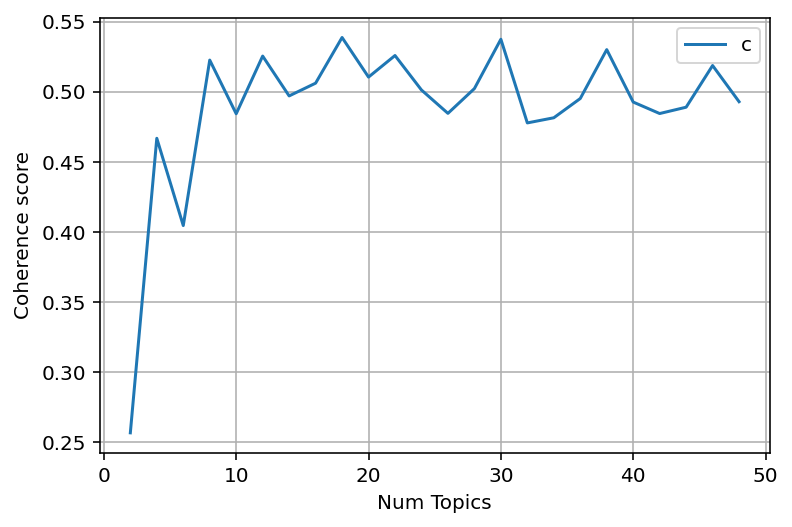

In [46]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

find_optimal_number_of_topics(dictionary, corpus, mas_double_list)

In [47]:
import pyLDAvis
import pyLDAvis.gensim as gensimvis
# k = 12

# #  모델 생성
# lda_model = gensim.models.ldamulticore.LdaMulticore(corpus, iterations = 12, num_topics = k, id2word = dictionary , passes = 1, workers = 10)

# # 분석 결과 확인 
# print(lda_model.print_topics(num_topics = k, num_words = 15))

# prepared_data = gensimvis.prepare(lda_model, corpus, dictionary)
# pyLDAvis.save_html(prepared_data, 'LDA.html')
# pyLDAvis.display(prepared_data)

In [48]:
perplexity_logger = PerplexityMetric(corpus=corpus, logger='shell') 
coherence_logger = CoherenceMetric(corpus=corpus, coherence="u_mass", logger='shell')

In [ ]:
lda_model = LdaModel(corpus, id2word=dictionary, num_topics=14, passes=10, callbacks=[coherence_logger, perplexity_logger])

topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

    # Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=lda_model, texts=mas_double_list, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score (c_v): ', coherence_lda)

    # Compute Coherence Score using UMass
coherence_model_lda = CoherenceModel(model=lda_model, texts=mas_double_list, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score (u_mass): ', coherence_lda)

2021-08-26 23:29:32,142 : INFO : using symmetric alpha at 0.07142857142857142
2021-08-26 23:29:32,143 : INFO : using symmetric eta at 0.07142857142857142
2021-08-26 23:29:32,144 : INFO : using serial LDA version on this node
2021-08-26 23:29:32,148 : INFO : running online (multi-pass) LDA training, 14 topics, 10 passes over the supplied corpus of 17689 documents, updating model once every 2000 documents, evaluating perplexity every 17689 documents, iterating 50x with a convergence threshold of 0.001000
2021-08-26 23:29:32,149 : INFO : PROGRESS: pass 0, at document #2000/17689
2021-08-26 23:29:33,402 : INFO : merging changes from 2000 documents into a model of 17689 documents
2021-08-26 23:29:33,410 : INFO : topic #5 (0.071): 0.034*"밥" + 0.031*"과자" + 0.014*"아이" + 0.014*"빵" + 0.012*"간식" + 0.010*"맛" + 0.007*"밥맛" + 0.007*"유기농" + 0.007*"쌀밥" + 0.007*"집"
2021-08-26 23:29:33,439 : INFO : topic #6 (0.071): 0.014*"맛" + 0.013*"과자" + 0.013*"지역" + 0.013*"케이크" + 0.011*"빵" + 0.009*"피자" + 0.009*"밥" + 

(0, '0.106*"빵" + 0.072*"식빵" + 0.030*"카스테라" + 0.029*"발효" + 0.024*"맛"')
(1, '0.086*"가루" + 0.034*"반죽" + 0.026*"쿠키" + 0.022*"맛" + 0.022*"밀가루"')
(2, '0.042*"맛" + 0.040*"떡볶이" + 0.024*"핫도그" + 0.021*"맛집" + 0.019*"소스"')
(3, '0.119*"케이크" + 0.039*"카페" + 0.035*"디저트" + 0.027*"전병" + 0.024*"클래스"')
(4, '0.067*"수업" + 0.034*"선물" + 0.030*"강정" + 0.026*"조청" + 0.021*"클래스"')
(5, '0.099*"밥" + 0.032*"보관" + 0.023*"도정" + 0.021*"밥맛" + 0.020*"햅쌀"')
(6, '0.015*"지역" + 0.013*"벼" + 0.012*"일본" + 0.011*"생산" + 0.010*"상품"')
(7, '0.094*"현미" + 0.053*"밥" + 0.032*"누룽지" + 0.029*"다이어트" + 0.024*"백미"')
(8, '0.116*"과자" + 0.056*"유기농" + 0.042*"아이" + 0.038*"간식" + 0.033*"맛"')
(9, '0.170*"곤약" + 0.078*"밥" + 0.060*"고로케" + 0.043*"칼로리" + 0.033*"다이어트"')
(10, '0.095*"떡" + 0.042*"물" + 0.027*"맛" + 0.024*"떡국" + 0.017*"컵"')
(11, '0.123*"이유식" + 0.108*"가루" + 0.065*"미음" + 0.033*"물" + 0.018*"소고기"')
(12, '0.121*"피자" + 0.052*"배달" + 0.043*"고구마" + 0.038*"박스" + 0.034*"맛"')
(13, '0.027*"집" + 0.016*"마트" + 0.014*"맛" + 0.013*"엄마" + 0.013*"아이"')


2021-08-26 23:31:29,325 : INFO : 1 batches submitted to accumulate stats from 64 documents (403 virtual)
2021-08-26 23:31:29,329 : INFO : 2 batches submitted to accumulate stats from 128 documents (1281 virtual)
2021-08-26 23:31:29,332 : INFO : 3 batches submitted to accumulate stats from 192 documents (1473 virtual)
2021-08-26 23:31:29,680 : INFO : 9 batches submitted to accumulate stats from 576 documents (-5107 virtual)
2021-08-26 23:31:29,801 : INFO : 12 batches submitted to accumulate stats from 768 documents (-6465 virtual)
2021-08-26 23:31:29,832 : INFO : 14 batches submitted to accumulate stats from 896 documents (-5185 virtual)
2021-08-26 23:31:29,999 : INFO : 21 batches submitted to accumulate stats from 1344 documents (-11244 virtual)
2021-08-26 23:31:30,015 : INFO : 23 batches submitted to accumulate stats from 1472 documents (-10572 virtual)
2021-08-26 23:31:30,063 : INFO : 25 batches submitted to accumulate stats from 1600 documents (-8772 virtual)
2021-08-26 23:31:30,181


Coherence Score (c_v):  0.5767091607141474


2021-08-26 23:31:32,988 : INFO : CorpusAccumulator accumulated stats from 1000 documents
2021-08-26 23:31:33,003 : INFO : CorpusAccumulator accumulated stats from 2000 documents
2021-08-26 23:31:33,019 : INFO : CorpusAccumulator accumulated stats from 3000 documents
2021-08-26 23:31:33,035 : INFO : CorpusAccumulator accumulated stats from 4000 documents
2021-08-26 23:31:33,053 : INFO : CorpusAccumulator accumulated stats from 5000 documents
2021-08-26 23:31:33,072 : INFO : CorpusAccumulator accumulated stats from 6000 documents
2021-08-26 23:31:33,091 : INFO : CorpusAccumulator accumulated stats from 7000 documents
2021-08-26 23:31:33,109 : INFO : CorpusAccumulator accumulated stats from 8000 documents
2021-08-26 23:31:33,116 : INFO : CorpusAccumulator accumulated stats from 9000 documents
2021-08-26 23:31:33,124 : INFO : CorpusAccumulator accumulated stats from 10000 documents
2021-08-26 23:31:33,129 : INFO : CorpusAccumulator accumulated stats from 11000 documents
2021-08-26 23:31:33


Coherence Score (u_mass):  -2.4439477041377367


In [50]:
prepared_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.save_html(prepared_data, 'LDA2015_all.html')
pyLDAvis.display(prepared_data)

2021-08-26 23:38:49,458 : INFO : NumExpr defaulting to 8 threads.


In [51]:
doc_per_topic_list = []

for n in range(len(corpus)):
    doc_topic = lda_model[corpus[n]]
    doc_topic = sorted(doc_topic, key=lambda x: (x[1]), reverse=True)
    topic_most_pr = doc_topic[0][0]
    topic_pr = doc_topic[0][1]
    doc_per_topic_list.append([n, topic_most_pr, topic_pr])
    
doc_topic_df = pd.DataFrame(doc_per_topic_list, columns=['Doc_Num', 'Topic', 'Percentage'])



doc_topic_df = doc_topic_df.join(result_df["text"])  

doc_topic_df

doc_topic_df.groupby('Topic')[['Doc_Num']].count()

,Doc_Num
Topic,
0,971
1,1370
2,1083
3,885
4,1031
5,2511
6,1306
7,631
8,1163
